In [1]:
import os
import pandas as pd

# Define paths using raw string literals
train_pos_dir = r'Data\aclImdb\train\pos'
train_neg_dir = r'Data\aclImdb\train\neg'

# Load positive reviews
pos_reviews = []
for filename in os.listdir(train_pos_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(train_pos_dir, filename), 'r', encoding='utf-8', errors='ignore') as file:
            pos_reviews.append(file.read())

# Load negative reviews
neg_reviews = []
for filename in os.listdir(train_neg_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(train_neg_dir, filename), 'r', encoding='utf-8', errors='ignore') as file:
            neg_reviews.append(file.read())

# Create DataFrame
df_pos = pd.DataFrame(pos_reviews, columns=['review'])
df_pos['label'] = 1  # Positive reviews

df_neg = pd.DataFrame(neg_reviews, columns=['review'])
df_neg['label'] = 0  # Negative reviews

# Combine into a single DataFrame
df = pd.concat([df_pos, df_neg], axis=0).reset_index(drop=True)

# Check the first few rows
df.head()


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and stem the words
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to the reviews
df['cleaned_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package punkt to C:\Users\Marc
[nltk_data]     Jay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Marc
[nltk_data]     Jay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,cleaned_review,label
0,Bromwell High is a cartoon comedy. It ran at t...,bromwel high cartoon comedi ran time program s...,1
1,Homelessness (or Houselessness as George Carli...,homeless houseless georg carlin state issu yea...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overact lesley ann warren best drama...,1
3,This is easily the most underrated film inn th...,easili underr film inn brook cannon sure flaw ...,1
4,This is not the typical Mel Brooks film. It wa...,typic mel brook film much less slapstick movi ...,1


In [14]:
# Check the cleaned text
# Display the first 10 rows and the last 10 rows of the DataFrame
pd.concat([df[['review', 'cleaned_review', 'label']].head(10), df[['review', 'cleaned_review', 'label']].tail(10)])

,review,cleaned_review,label
0,Bromwell High is a cartoon comedy. It ran at t...,bromwel high cartoon comedi ran time program s...,1
1,Homelessness (or Houselessness as George Carli...,homeless houseless georg carlin state issu yea...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overact lesley ann warren best drama...,1
3,This is easily the most underrated film inn th...,easili underr film inn brook cannon sure flaw ...,1
4,This is not the typical Mel Brooks film. It wa...,typic mel brook film much less slapstick movi ...,1
5,"This isn't the comedic Robin Williams, nor is ...",isnt comed robin william quirkyinsan robin wil...,1
6,Yes its an art... to successfully make a slow ...,ye art success make slow pace thrillerbr br st...,1
7,"In this ""critically acclaimed psychological th...",critic acclaim psycholog thriller base true ev...,1
8,THE NIGHT LISTENER (2006) **1/2 Robin Williams...,night listen 2006 12 robin william toni collet...,1
9,"You know, Robin Williams, God bless him, is co...",know robin william god bless constantli shoot ...,1


In [34]:
# Save the cleaned dataframe to a CSV file
df.to_csv('cleaned_reviews.csv', index=False)

# Load the cleaned dataframe from CSV if needed
df = pd.read_csv('cleaned_reviews.csv')


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X = vectorizer.fit_transform(df['cleaned_review'])

# Check the shape of the resulting feature matrix
print(X.shape)


(25000, 5000)


In [36]:
from sklearn.model_selection import train_test_split

# Features (X) are the vectorized reviews, and target (y) is the sentiment label
X = vectorizer.transform(df['cleaned_review'])
y = df['label']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')


Training set shape: (20000, 5000)
Test set shape: (5000, 5000)


C:\Users\Marc Jay\AppData\Local\Temp\ipykernel_32780\2689345742.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")


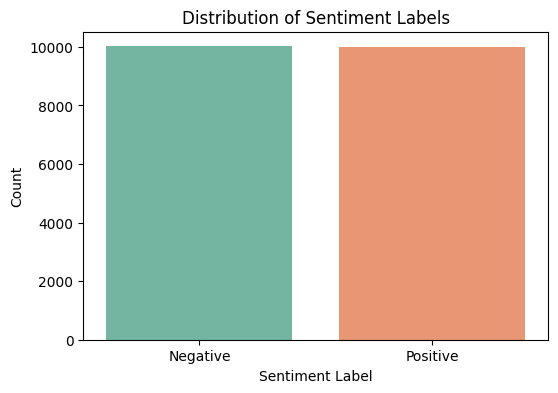

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_train' is your target variable for the training set

# Plotting the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette="Set2")
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


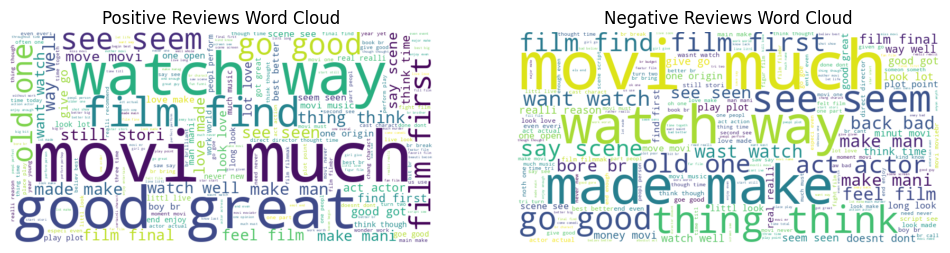

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a vectorizer that was used to vectorize the data
# Example: vectorizer = CountVectorizer() or TfidfVectorizer()

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a NumPy array for indexing
X_train_array = X_train.toarray()  # Converting sparse matrix to dense NumPy array

# Convert the dense rows back to words for positive and negative reviews
def get_words_from_row(row, feature_names):
    # Find non-zero indices of the row (word indices)
    non_zero_indices = row.nonzero()[0]  # .nonzero()[0] gives the indices of non-zero values
    # Map those indices to the corresponding words
    words = [feature_names[i] for i in non_zero_indices]
    return words

# Convert the sparse rows back to words for positive and negative reviews
positive_reviews = [get_words_from_row(row, feature_names) for row in X_train_array[y_train == 1]]
negative_reviews = [get_words_from_row(row, feature_names) for row in X_train_array[y_train == 0]]

# Join all words together for word cloud generation
positive_text = " ".join([" ".join(review) for review in positive_reviews])
negative_text = " ".join([" ".join(review) for review in negative_reviews])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plotting the word clouds
plt.figure(figsize=(12, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

plt.show()


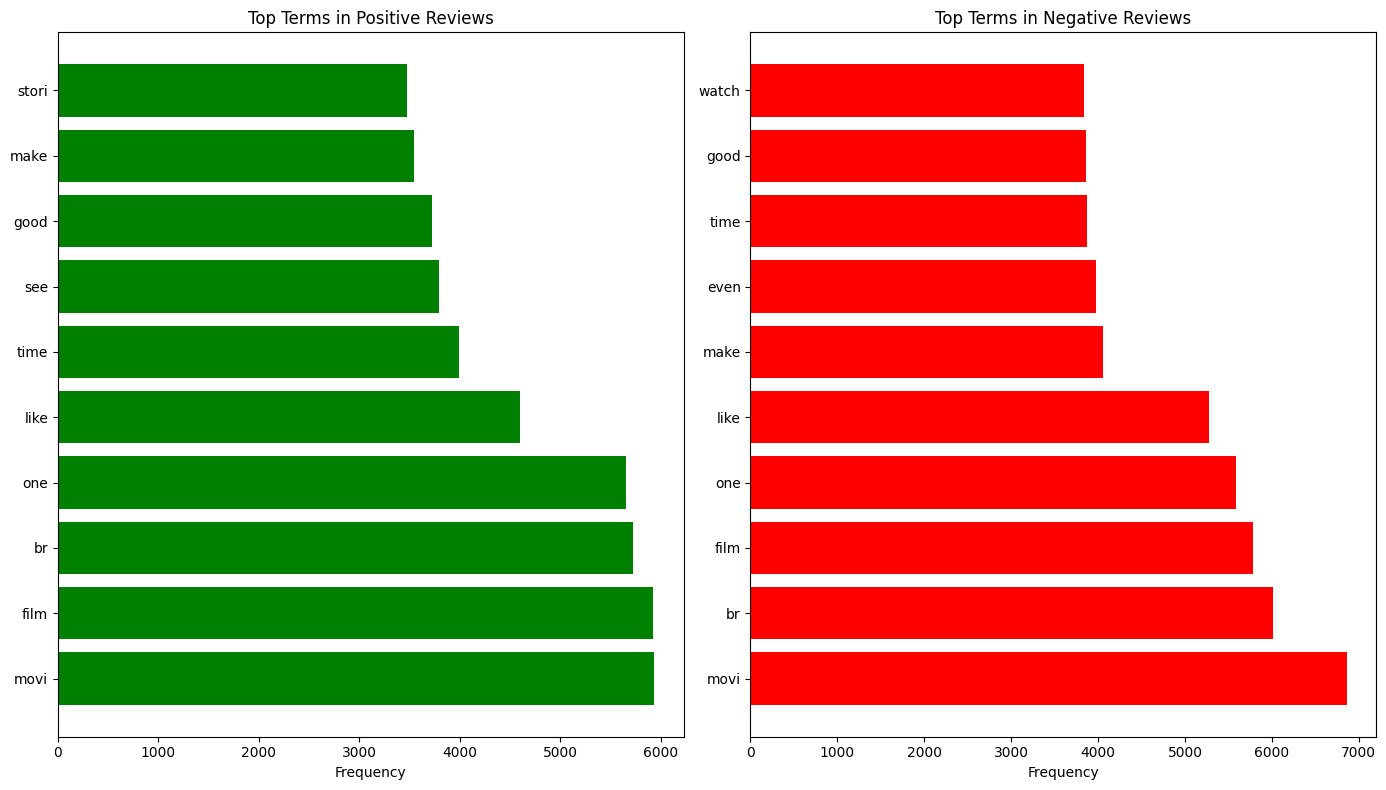

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Function to count word frequencies in a list of reviews
def get_top_terms(reviews, top_n=10):
    # Flatten the list of reviews into a single list of words
    all_words = [word for review in reviews for word in review]
    word_counts = Counter(all_words)
    top_terms = word_counts.most_common(top_n)
    return top_terms

# Get top 10 terms from positive and negative reviews
positive_top_terms = get_top_terms(positive_reviews, top_n=10)
negative_top_terms = get_top_terms(negative_reviews, top_n=10)

# Separate words and counts for plotting
positive_words, positive_counts = zip(*positive_top_terms)
negative_words, negative_counts = zip(*negative_top_terms)

# Plotting the bar chart for top terms in positive reviews
plt.figure(figsize=(14, 8))  # Increase figure width

# Positive bar chart
plt.subplot(1, 2, 1)
plt.barh(positive_words, positive_counts, color='green')
plt.xlabel('Frequency')
plt.title('Top Terms in Positive Reviews')

# Negative bar chart
plt.subplot(1, 2, 2)
plt.barh(negative_words, negative_counts, color='red')
plt.xlabel('Frequency')
plt.title('Top Terms in Negative Reviews')

# Ensure proper word wrapping
plt.tight_layout()  # Automatically adjust layout to fit labels properly
plt.show()


Correlation between review length and sentiment: 0.0032365610771845103


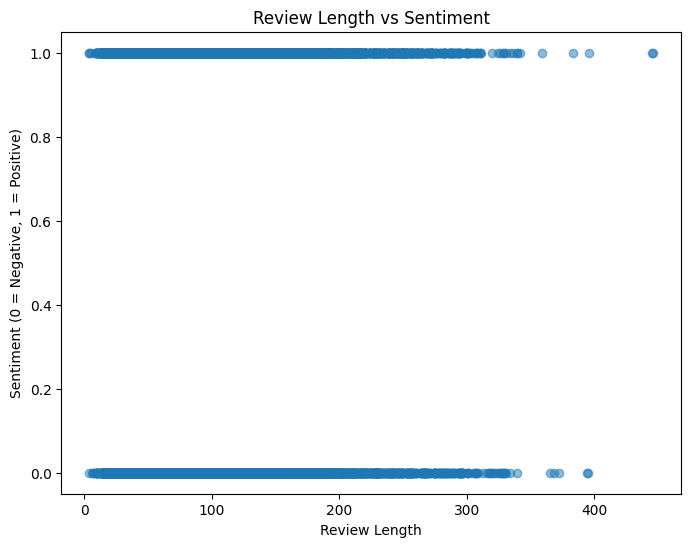

In [48]:
# Calculate the number of non-zero elements (terms) in each row (representing each review)
review_lengths = X_train.getnnz(axis=1)

# Convert review lengths into a DataFrame for easy analysis
import pandas as pd
data = pd.DataFrame({
    'review_length': review_lengths,
    'sentiment': y_train
})

# Calculate correlation between review length and sentiment
correlation = data['review_length'].corr(data['sentiment'])

print(f"Correlation between review length and sentiment: {correlation}")

# Optional: Plot review length vs sentiment
plt.figure(figsize=(8, 6))
plt.scatter(data['review_length'], data['sentiment'], alpha=0.5)
plt.title('Review Length vs Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Sentiment (0 = Negative, 1 = Positive)')
plt.show()


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Set up the parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.1, 0.5, 1, 5],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Using solver that supports l1 and l2 penalties
}

# Perform GridSearchCV for Logistic Regression with n_jobs=-1 for parallel processing
grid_log_reg = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_log_reg.fit(X_train_dense, y_train)

# Best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", grid_log_reg.best_params_)


Best hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the training data (or validation data if you have it)
y_pred = grid_log_reg.predict(X_train_dense)

# Evaluate different metrics
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, grid_log_reg.predict_proba(X_train_dense)[:, 1])

# Print the evaluation results
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC-AUC: ", roc_auc)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))


Precision:  0.9053736026671897
Recall:  0.9246870305458187
F1 Score:  0.9149284050933955
ROC-AUC:  0.9719803469557807

Confusion Matrix:
 [[9050  965]
 [ 752 9233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     10015
           1       0.91      0.92      0.91      9985

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



In [57]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform GridSearchCV for XGBoost
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_dense, y_train)

# Best hyperparameters for XGBoost
print("Best hyperparameters for XGBoost:", grid_xgb.best_params_)

# Make predictions with the best model
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test_dense)

# Evaluate the XGBoost model
print("\nXGBoost Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))



KeyboardInterrupt: 